In [1]:
import pandas as pd
import sqlite3 as lite
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
import scipy.cluster.hierarchy as spc
import seaborn as sns
%matplotlib inline

In [2]:
con=lite.connect('Settings.yr')
dat=pd.read_sql_query("SELECT TagCode FROM tblTagsConfig",con)
dat=dat.iloc[0:50,:]
con.close()

In [3]:
con = lite.connect('2019.yr')
data1=pd.read_sql_query("SELECT HourTime FROM tblTagHourlyValues",con,parse_dates=['HourTime'], index_col='HourTime')

In [4]:
data=data1['2019-01-03 08:00:00.00':]
newD = pd.DataFrame(data)

con.close()

In [5]:
newD.head()

""
HourTime
2019-01-03 08:00:00
2019-01-03 09:00:00
2019-01-03 11:00:00
2019-01-03 12:00:00
2019-01-03 13:00:00


In [6]:
con = lite.connect('2019.yr')
for n in range(len(dat)):
    num=dat.iloc[n,0]
    data1=pd.read_sql_query("SELECT CurrentValue,HourTime FROM tblTagHourlyValues where TagCode="+str(num),con,parse_dates=['HourTime'], index_col='HourTime')
    data=data1['2019-01-03 08:00:00.00':]
    newD[num]=data
con.close() 

In [15]:
newD=newD.replace(0,1)
newD.head()

,129,132,133,135,136,138,139,140,141,142,...,176,177,178,179,180,181,182,183,184,185
HourTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 08:00:00,1562.418167,1.0,68.4,1.0,5.089201,5.753872,3.333278,3.333278,3.333278,9.672457,...,9.920469,1.0,9.920469,1.0,9.920469,1.0,9.920469,1.0,9.920469,1.0
2019-01-03 09:00:00,1052.611827,1.0,25.0,1.0,51.095554,54.822766,43.659093,43.662828,43.662828,72.011561,...,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0
2019-01-03 11:00:00,7231.687685,1.0,7.9,1.0,50.060135,52.455269,51.151714,51.151714,51.151714,52.132036,...,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0
2019-01-03 12:00:00,10627.453934,1.0,59.2,1.0,50.294928,52.031884,51.382195,51.382195,51.386542,51.976449,...,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0
2019-01-03 13:00:00,14434.868114,1.0,85.5,1.0,50.211227,52.388815,52.048998,51.975376,51.978881,51.921327,...,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0,100.000000,1.0


In [16]:
corr = newD.corr().values
corr

array([[ 1.        ,         nan, -0.04518089, ...,         nan,
         0.09612577,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.04518089,         nan,  1.        , ...,         nan,
         0.00535922,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.09612577,         nan,  0.00535922, ...,         nan,
         1.        ,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

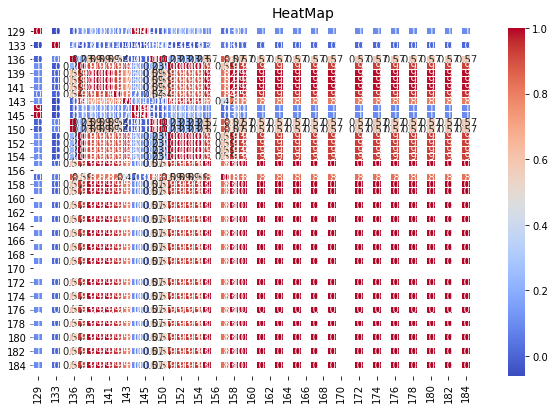

In [17]:
f, ax = plt.subplots(figsize=(10, 6))

hm = sns.heatmap(round(newD.corr(),2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('HeatMap', fontsize=14)

In [22]:
pdist = spc.distance.pdist(corr,'canberra')
pdist

array([ 0.        , 29.97390554,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [19]:
linkage = spc.linkage(pdist, method='ward')

In [20]:
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

In [21]:
idx

array([2, 2, 1, 2, 3, 4, 4, 4, 4, 4, 4, 2, 2, 3, 3, 4, 4, 4, 4, 4, 1, 4,
       4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 3,
       4, 3, 4, 4, 4, 4], dtype=int32)

In [23]:
idx=pd.DataFrame(idx)
df=pd.concat([dat,idx],axis=1)
df.columns = ['TagCode', 'Labels']

In [24]:
df

,TagCode,Labels
0,129,2
1,132,2
2,133,1
3,135,2
4,136,3
5,138,4
6,139,4
7,140,4
8,141,4
9,142,4


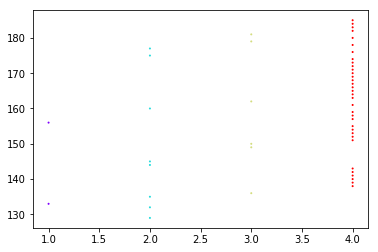

In [25]:
x=df['TagCode'].values
y=df['Labels'].values
plt.scatter(y,x, c=y, cmap='rainbow',s=1)

In [26]:
con = lite.connect('output1.sqlite3')
df['id']=range(len(df))
df.to_sql("final", con, if_exists="replace",index=False)
con.close()

In [ ]:
#js=df.to_json(orient='table',index=False)

In [ ]:
#js

In [ ]:
#df.to_csv('output.csv',index=False)